# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#set figure size
plt.rcParams["figure.figsize"] = [8,5]
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Data

In [2]:
df = pd.read_csv("/content/insurance (1).csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Shape of Data

In [4]:
df.shape

(1338, 7)

# Basic EDA

# EDA with bmi and Charges

Text(0.5, 1.0, 'BMI VS CHARGES')

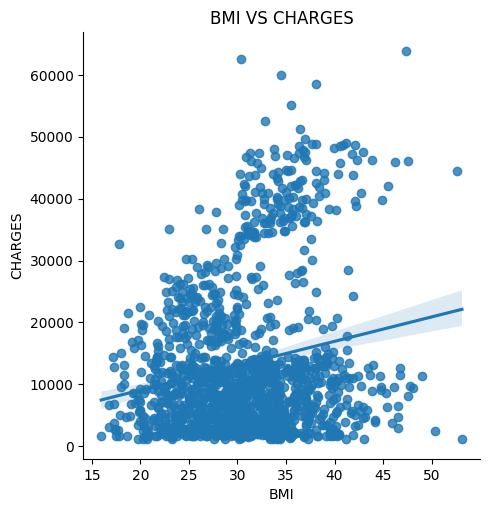

In [5]:
sns.lmplot(x = 'bmi',y = 'charges',data = df)
plt.xlabel("BMI")
plt.ylabel("CHARGES")
plt.title("BMI VS CHARGES")

# Age vs charges

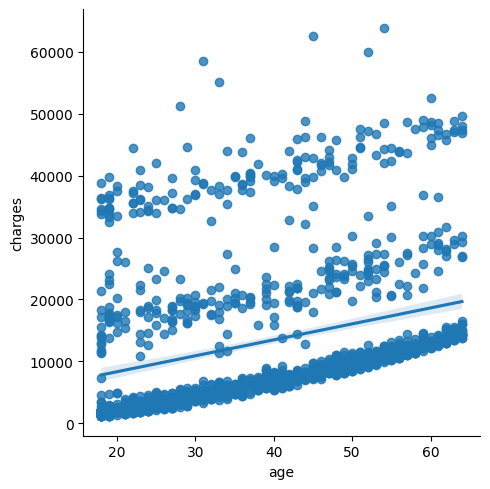

In [6]:
sns.lmplot(x = "age", y = "charges",data = df)

# sex vs charges

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#correlation plot
corr = df.corr(numeric_only = True)
corr
#sns.heatmap(corr, cmap = 'Wistia', annot = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='charges', ylabel='Count'>

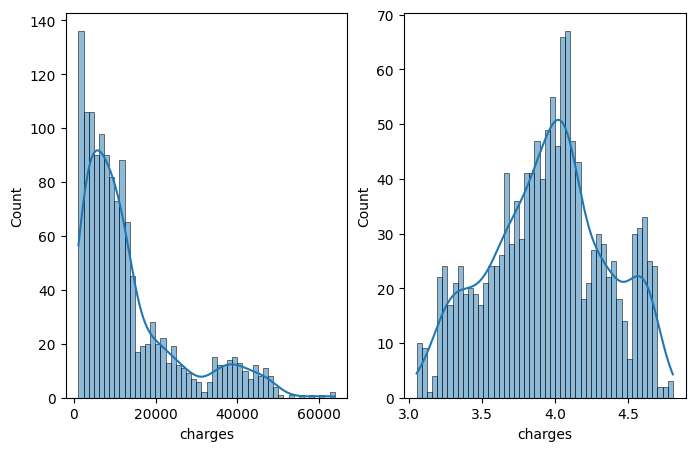

In [10]:
fig,(ax1,ax2) = plt.subplots(ncols = 2)
#target column
sns.histplot(x = 'charges',data = df,kde = True,bins = 50,ax = ax1)
#rightskewed
#To correct skewness in the data , we perform log transformation
sns.histplot(np.log10(df['charges']),kde = True,bins = 50, fill = True,ax = ax2)


smoker vs charges and sex vs ***charges

<Axes: xlabel='sex', ylabel='charges'>

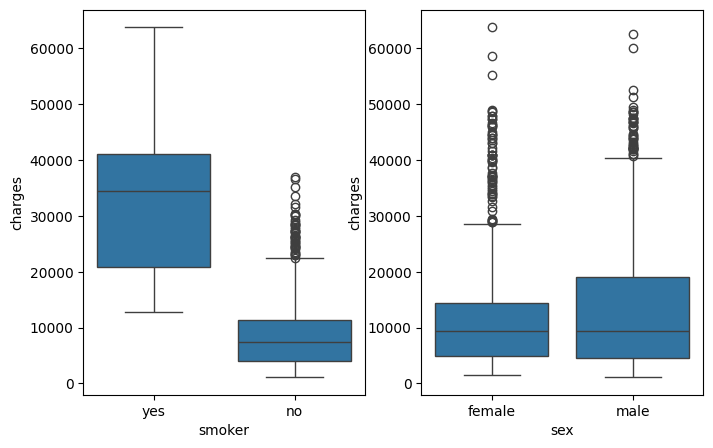

In [11]:
fig,(ax1,ax2) = plt.subplots(ncols = 2)
sns.boxplot(x = 'smoker', y = 'charges',data = df,ax = ax1)
sns.boxplot(x = 'sex', y = 'charges',data = df,ax = ax2)

In [12]:
#children vs charges
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

<Axes: xlabel='children', ylabel='charges'>

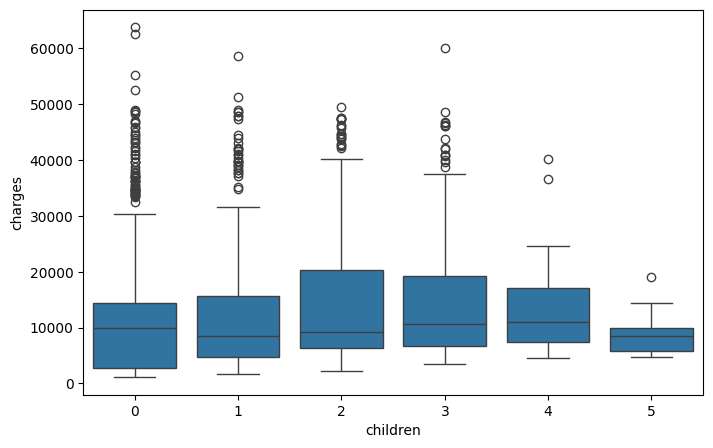

In [13]:
sns.boxplot(x = 'children', y = 'charges',data = df)

# Data Preprocessing - Encoding

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
catagorical_columns = ['sex','children','smoker','region']
#one hot Encodeng -- Machine learning models generally work with numerical data. One-hot encoding converts categorical variables into a binary format, representing each category with a unique binary column. This allows the model to process and understand the categorical information.
df_encoded = pd.get_dummies(data = df,prefix = 'OHE',prefix_sep = "_",columns = catagorical_columns,drop_first = True,dtype = 'int8')

In [16]:
df_encoded.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
df_encoded['charges'] = np.log10(df_encoded['charges'])
df_encoded['charges']

0       4.227499
1       3.236928
2       3.648308
3       4.342116
4       3.587358
          ...   
1333    4.025328
1334    3.343602
1335    3.212143
1336    3.302752
1337    4.464510
Name: charges, Length: 1338, dtype: float64

In [19]:
X = df_encoded.drop(['charges'],axis = 1 )
y = df_encoded['charges']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 23)

# Traing the model

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [22]:
lin_reg.coef_

array([ 0.01439002,  0.00587029, -0.02943099,  0.06490821,  0.11852708,
        0.10600906,  0.22728308,  0.20239429,  0.67336524, -0.02425312,
       -0.06365815, -0.05798184])

In [23]:
lin_reg.intercept_

3.0657592155426676

# Test the model

In [24]:
y_pred = lin_reg.predict(X_test)

In [25]:
y_pred

array([4.05111071, 3.76323003, 4.49471303, 3.94587129, 3.65154412,
       3.90016511, 4.66880948, 3.71809718, 4.11984569, 4.75822147,
       3.5298516 , 4.79365531, 3.5607964 , 4.1019963 , 3.82468072,
       3.7059901 , 3.74948038, 3.52244257, 4.53481197, 4.53638645,
       4.86542784, 3.9776379 , 3.84918757, 3.99032979, 4.59907446,
       3.69570472, 3.71458617, 4.17578721, 3.46744487, 3.96034688,
       4.07722567, 3.54699262, 3.65033397, 4.10456405, 3.81135188,
       4.26711922, 4.06901467, 3.92135685, 3.99900304, 3.64326587,
       3.99441526, 4.6013979 , 3.99161371, 4.58591857, 4.02182527,
       4.03845297, 3.67917003, 3.71615623, 3.93688137, 3.77572784,
       4.08868301, 3.84225304, 3.96881833, 3.6052219 , 3.66610261,
       4.06214373, 4.0207601 , 3.98127049, 3.83175689, 4.17762365,
       4.32177717, 3.6886493 , 3.43380444, 3.66598796, 3.53355203,
       3.74664171, 3.48583603, 3.45059346, 3.66158078, 4.10661913,
       3.76913543, 4.59179609, 3.94060076, 4.48647861, 3.48334

In [26]:
y_test

918     4.115342
755     3.701678
207     4.321890
520     4.409199
695     3.505319
          ...   
1302    3.506341
1191    4.137527
1085    4.279285
663     3.055531
977     3.462833
Name: charges, Length: 402, dtype: float64

In [27]:
mean_squared_error(y_pred,y_test)

0.03532625850724221

# R2 Square

In [28]:
lin_reg.score(X_test,y_test)

0.7795687545055319